University of Michigan - ROB 101 Computational Linear Algebra

# Lab 6: Vector Space Fundamentals and a Super Power of Linear Algebra 

- Skills
    - Review of linear independence
    - Using null space to determine linear independence
    - Regressing functions to data
        - Line fitting
        - Polynomial curve fitting
        - Surface fitting

## Example 1. Linear Independence

As learned in Lab5 and HW5, we can determine whether a matrix has independent columns by checking the following statements.

<img src = "https://i.postimg.cc/DyKPg9KX/Pro-Tip-Linear-Independence.png" width = 700>

In [ ]:
using LinearAlgebra

# Determine the independence using LU Factorization
function is_independent(A)
    U = lu(A'*A,check=false).U 
    min_diagU = minimum(abs.(diag(U)))
    if min_diagU > 1e-10
        return true
    else
        return false
    end
    # Alternative to the if statement...a one liner
    # return !isapprox(min_diagU, 0, atol = 1E-10)
end

In [ ]:
A = [1 0 2; 2 -2 6; 3 4 2; 1 5 -3]
is_independent(A)

## Practice 1.

Use the determinant property to define a new function ``is_independentDet'' to determine whether the input matrix has independet columns. Refer to the third point in previous figure.

In [ ]:
# Determine independence using the determinant instead of LU
# For the record, LU is numerically superior
function is_independentDet(A,aTol=1e-10)
    # your code here
    # your code here
    throw(ErrorException())
end

In [ ]:
# Self-check cell
A = [0 0 1; 0 2 -2; 1 -2 1;]
B = [0 0 1 4; 0 2 -2 2; 1 -2 1 3;]
T1 = @assert(is_independentDet(A) == true)
T2 = @assert(is_independentDet(B) == false)
println("all nothings means likely correct")
@show [T1 T2]

## Practice 2.

Use the above function to determine whether a set of vectors is linearly independent or not.

In [ ]:
# Given a set of vectors
a1 = [0, 0, 1]
a2 = [0, 2, -2]
a3 = [1, -2, 1]

# your code here
# your code here
throw(ErrorException())

## Example 2. The Null Space - Another way to check if vectors are linearly independent or not
Consider a set of vectors $\{ v_1, v_2, \ldots, v_m\} \subset R^n$ and form the matrix $A = \left[ v_1 ~ v_2 ~\cdots ~v_m\right]$. From lecture, the null space of $A$ is 
$${\rm null}(A):=\{x \in R^m~| ~ A x = 0_{n \times 1}   \} $$
If $x \in {\rm null}(A)$ and $x \neq 0_{m \times 1} $, then we have a set of non-zero coefficients such 
$$x_1 v_1 + x_2 v_2 + \ldots + x_m v_m = 0_{n \times 1} $$
which means the vectors are **linearly dependent**. On the other hand, if the null space of $A$ consists only of the zero vector, then the set of vectors is linearly independent.

## Remark: If you do not like denoting the coefficients in the linear combination by $x_i$, then we can use $\alpha_i$ instead and write 
$$\alpha_1 v_1 + \alpha_2 v_2 + \ldots + \alpha_m v_m = 0_{n \times 1} $$

In [ ]:
# The nullspace command in Julia LinearAlgebra package
using LinearAlgebra

A = [1 2 3 4; 5 6 7 8; 9 10 11 12]
println("If a nullspace is a subspace, why is the command only returning two vectors?")
V = nullspace(A)

In [ ]:
# The output is an "orthonormal basis" of the nullspace of A. In the next lecture, we'll define the concept of two vectors
# being orthognonal and then orthonormal. By the end of next week, you will know what is a basis of a subspace. 
# In short: it's the smallest set of vectors whose span equals the subspace! 
v1 = V[:,1]
v2 = V[:,2]
@show A*v1
@show A*v2
@show v1'*v2
@show [norm(v1) norm(v2)]

In [ ]:
# A helper function to zero out small entries of a matrix or vector
function cleanUp(A,tol=1e-10)
    B=copy(A)
    indicesSmall=findall(x->x<tol, abs.(B))
    B[indicesSmall]=0.0*B[indicesSmall]
    return B
end

# In case you want to see those zeros!
cleanUp(A*v1)
cleanUp(A*v2)

## Exercise 2. 
Determine if the set of vectors $\{v_1, v_2, ..., v_m\}$ is linearly independent or not. If they are linearly dependent, find a set of not all  identically zero coefficients such that $\alpha_1 v_1 + \alpha_2 v_2 + \cdots + \alpha_m v_m = 0$. In other words, find a non-trivial linear combination of the set of vectors that adds up to the zero vector.

In [ ]:
using Random
Random.seed!(2021)
v1=randn(4,1)
v2=randn(4,1)
v3=randn(4,1)
v4=randn(4,1)
v5=randn(4,1)
v6=randn(4,1)

# Place your code below
# Compute alpha = [alpha1; alpha2; ...; alpha6]
# such that alpha1*v1 + alpha2*v2 + ... + alpha6*v6 = 0
# your code here
# your code here
throw(ErrorException())

In [ ]:
# Self-check cell
println("all nothings means likely correct")
T = @assert (norm(alpha[1]*v1+alpha[2]*v2+alpha[3]*v3+alpha[4]*v4+alpha[5]*v5+alpha[6]*v6) < 1.0e-10)
@show T

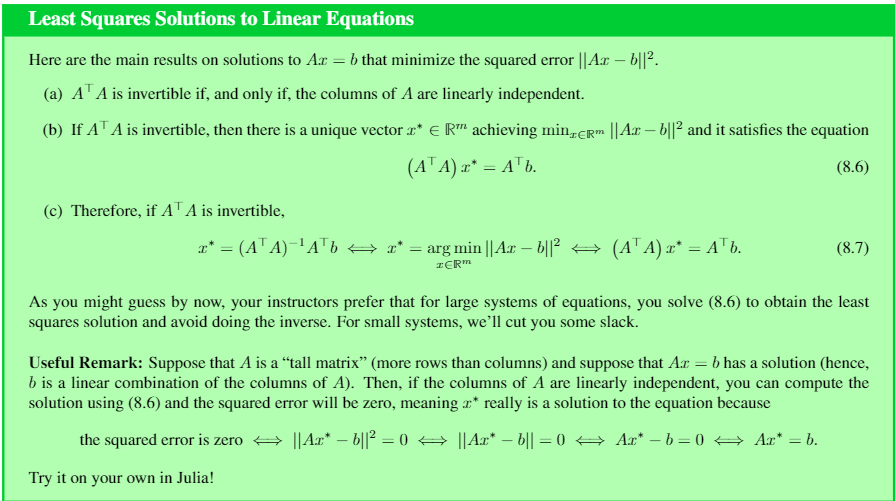

## Example 3. Regression: Line Fitting

The linear regression of a line can be written as the set of linear equations:
$$y_i = m x_i +b = b + m x_i=\begin{bmatrix} 1 & x_i \end{bmatrix} \begin{bmatrix} b \\ m \end{bmatrix},  ~~1 \le i \le N,$$ 
where $N$ is the number of data points.

In Matrix Form:
$$\begin{equation}
    \label{eq:FirstRegressionModel02}
\underbrace{\begin{bmatrix} y_1 \\ y_2 \\ \vdots \\y_N \end{bmatrix}}_{Y} = \underbrace{\left[\begin{array}{cc}
    1 & x_1 \\
    1  & x_2 \\
    1 & \vdots \\
    1 & x_N
\end{array}  \right]}_{\Phi} \cdot  \underbrace{\begin{bmatrix} b \\ m \end{bmatrix}}_{\alpha},
\end{equation}$$
where $Y$ is the vector of measured outputs of our function, $\Phi$ is called the regressor matrix, and $\alpha$ is the vector of unknown coefficients that parameterize the  model.

####  Key Result: Applying the result from least squared error solutions of linear equations to the setting of regression problems yields: if the columns of $\Phi$ are linearly independent, or equivalently, $\Phi^\top \Phi$ is invertible, then the following are equivalent 
$$
  \alpha^\ast = \left( \Phi^\top \Phi \right)^{-1}\Phi^\top Y  \iff  \alpha^\ast = \underset{\alpha}{\rm arg~min} ||Y-\Phi \alpha ||^2 \iff \left( \Phi^\top \Phi \right) \alpha^\ast = \Phi^\top Y.
$$
#### The suggested ``pipeline'' for  computing a least squared error solution to $ \left( \Phi^\top \Phi \right) \alpha^\ast = \Phi^\top Y$ is 

* factor $P \cdot \left( \Phi^\top \Phi \right)  =: L \cdot U$, that is, do the LU Factorization of $\Phi^\top \cdot \Phi$,
* compute $\overline{b}:= P \cdot \Phi^\top Y$, and then 
* solve $L y = \overline{b}$ via forward substitution, and
* solve $U \alpha^\ast =y$ via backward substitution.


In [ ]:
# Generate some points for line fitting
using Random
Random.seed!(2021)
NumPts = 100
m = 2
b = 1
x = -1 .+ 2*rand(NumPts,1)
y = m*x .+ b + 0.10*randn(NumPts, 1)

using Plots
scatter(x, y, legend=false)

In [ ]:
# Run me, don't change me. I am providing some nice functions for you.
##Forward and Back substitution functions from HW04

#This is a back substitution function.  It solves for x in an equation Ux = b, where U is upper triangular.
# The function assumes U and b are the correct sizes. You can add error checking, if you wish.
function backwardsub(U, b)
    # Check if U is non-signular
    min_diagU = minimum(abs.(diag(U)))
    if min_diagU <  1E-10
        return false
    end
    n = length(b)
    x = Vector{Float64}(undef, n) 
    x[n] = b[n]/U[n,n]
    for i in n-1:-1:1
        x[i]=(b[i]- (U[i,(i+1):n])' *x[(i+1):n] )./U[i,i]
    end
    return x
end
#This is a forward substitution function. It solves for x in an equation Lx = b, where L is lower triangular.
# The function assumes L and b are the correct sizes. You can add error checking, if you wish.
function forwardsub(L, b)
     # Check if L is non-signular
    min_diagL = minimum(abs.(diag(L)))
    if min_diagL <  1E-10
        return false
    end
    n = length(b)
    x = Vector{Float64}(undef, n); 
    x[1] = b[1]/L[1,1] 
    for i = 2:n 
        x[i]=(b[i]- (L[i,1:i-1])' *x[1:i-1] )./L[i,i] 
    end
    return x
end

In [ ]:
# Create the Y and the regressor matrix Phi
Y = y
Phi = [ones(NumPts,1) x]

# Find the alpha by solving Phi' * Y= Phi' * Phi*alpha (Ax = b) using LU decomposition
using LinearAlgebra
F = lu(Phi' * Phi)
L = F.L
U = F.U
P = F.P

# Phi' * Y = Phi' * Phi * alpha
# after LU Factorization of Phi'*Phi, we have
# P *  Phi' * Y  = L * U * alpha
y_alpha = forwardsub(L, P*Phi'*Y)
alpha = backwardsub(U, y_alpha)

In [ ]:
# Plot the regression results
y_hat = Phi * alpha # Result of fitting our data
mse = norm(y-y_hat)^2/size(y,1) # Mean Square Error
println("The mean square error is ", mse)

scatter(x, y, label="y")
scatter!(x, y_hat, label="y_hat")

## Exercise 3. Polynomial curve fitting

In [ ]:
# Generate some data for polynomial curve fitting
using Random
Random.seed!(123456789)
NumPts = 1000
x = -1 .+ 2*rand(NumPts,1)
a0 = 3
a1 = 6
a2 = 4
a3 = 5
a4 = -5
y = a4*x.^4 + a3*x.^3 + a2*x.^2 .+ a1*x.^1 .+ a0 + 0.20*randn(NumPts, 1)

using Plots
scatter(x,y,legend=false)

## Remark: note that in the above cell, we have created a column of x to a "power of m" by x.^m. The dot is important. It tells Julia to apply the power command ^m to each entry of the column vector x.

In [ ]:
# Place your code below
# Compute the alpha = [alpha0 alpha1 alpha2] of a 3rd order polynomial such that Y=Phi*alpha fits the data
#
# Yes, we know that the data comes from a 4th order polynomial. In real-life situations, you will not know 
# the exact function that generates the data.

# your code here 

# Create the Y and the regressor matrix Phi
# your code here
throw(ErrorException())

In [ ]:
# Plot the regression results
y_hat = Phi * alpha
mse = norm(y-y_hat)^2/size(y,1) # Mean Square Error
println("The mean square error is ", mse)

scatter(x, y, label="y")
scatter!(x, y_hat, label="y_hat")

In [ ]:
# Self-check cell
T = @assert(mse<0.2)
@show T

## WOW!!! Fit the Wavefield!

<img src="https://campusinfo.umich.edu/files/campusinfo/field/image/wave%20field_0.jpg">

In [ ]:
using LinearAlgebra

# Function for solving Ax=b using LU decomposition
function solveAxEqb(A,b,aTol=1e-10)
    nRows, nCols = size(A)
    if (length(b) !== nRows)||( nRows !== nCols)
         println("System of equations not properly formed")
        return x=undef
    end
    F=lu(A)
    indicesDiagUsmall=findall(x->x<aTol, abs.(diag(F.U)))
    if length(indicesDiagUsmall) > 0
        println("diagU has numbers that are nearly zero")
        return x=undef
    else
        y=forwardsub(F.L,F.P*b)
        x=backwardsub(F.U, y)
        return x 
    end
end

# Function for fitting data with Least Squares
function surface_fit(Phi, Z)
    alpha = solveAxEqb(Phi'*Phi, Phi'*Z) # Phi'*Z = Phi'*Phi * alpha
    Zhat = Phi*alpha
    Error = Z-Zhat
    SqError = Error'*Error
    MeanError = sqrt(SqError)/length(Z)
    return Zhat, Error, SqError, MeanError
end

In [ ]:
# run me, don't change me
using Distributions
using Plots
import Pkg;
Pkg.add("PyPlot");
println("Be patient. It takes time to load the Distributions package.")

In [ ]:
# Attempting to make the Wavefield!
z(x,y) = 0.2*sin(pi*x/2) - 0.2*cos(pi*y/3) + rand(Uniform(-0.03,0.03))

N = 100
Nsq = N^2
X = zeros(Nsq, 1)
Y = zeros(Nsq, 1)
Z = zeros(Nsq, 1)
for i = 1:N
    for j = 1:N
        X[(i-1)*N+j] = 10.0*i/N
        Y[(i-1)*N+j] = 10.0*j/N
        Z[(i-1)*N+j] = z(X[(i-1)*N+j], Y[(i-1)*N+j])
    end
end
scatter(X, Y, Z, marker_z=Z, legend=false, colorbar=true, camera=(-60, 60))

In [ ]:
# Creating regressor matrix Phi as polynomial fitting
# We include from a constant term, linear terms, quadratic terms, and stop after adding cubic terms
Phi = [ones(Nsq,1) X Y X.^2 Y.^2 X.*Y X.^3 Y.^3 (X).*(Y.^2) (Y).*(X.^2)]
Zhat, Error, SqError, MeanError = surface_fit(Phi, Z)
println("Squared error = $SqError and Mean Error = $MeanError")
println("The root mean squared error of our fit is $(MeanError*1e3) mm = $(MeanError*1e2/2.54) inches")

In [ ]:
# Make a scatter plot of Zhat
println("Note how bad the fit is...it does not look like the wavefield at all.")
scatter(X, Y, Zhat, marker_z=Error, legend=false, colorbar=true, camera=(-60, 60))

In [ ]:
# Make a scatter plot of the error
println("The fit is so bad, the error looks like the wave field!!!")
scatter(X, Y, Error, marker_z=Error, legend=false, colorbar=true, camera=(-60, 60))

In [ ]:
# We'll take another crack at it, using a method that makes it painless to include more terms

# Using for loop to build the regressor matrix Phi
m=8
Phi= Array{Float64,2}(undef, Nsq, 0)
avgX=mean(X)
avgY=mean(Y)
k=0
for i=0:m
    for j=0:m
        k=k+1
        Phi=[Phi ((X.-avgX).^i).*((Y.-avgY).^j)/(factorial(i)*factorial(j))]
    end
end
Zhat, Error, SqError, MeanError = surface_fit(Phi, Z)
println("Squared error = $SqError and Mean Error = $MeanError")
println("Now see what you think of the fit!")
scatter(X, Y, Zhat, marker_z=Error, legend=false, colorbar=true, camera=(-60, 60))

In [ ]:
# Make a scatter plot of the error
println("Now, that's what I call a small error plot.")
scatter(X, Y, Error, marker_z=Error, legend=false, colorbar=true, camera=(-60, 60))